In [71]:
import pandas as pd
import numpy as np

DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"
actiwave_data = pd.read_excel(DATA_PATH + "actiwave_TEST.xlsx")
audio_data = pd.read_excel(DATA_PATH + "audio_TEST.xlsx")
e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")
change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")

e4_data = e4_data.replace(0, np.NaN)
e4_data.dropna(inplace=True)
change_data = change_data.replace(0, np.NaN)
change_data.dropna(inplace=True)
audio_data = audio_data.replace(0, np.NaN)
audio_data.dropna(inplace=True)
actiwave_data = actiwave_data.replace(0, np.NaN)
actiwave_data.dropna(inplace=True)

#e4_data = pd.concat([e4_data, change_data.reindex(e4_data.index)], axis=1)

e4_data.insert(0, "person", [0] * e4_data.shape[0])
e4_data.insert(1, "trial", [0] * e4_data.shape[0])

for i, row in e4_data.iterrows():
    e4_data.at[i, "person"] = int(e4_data.at[i, "id"][7:])
    e4_data.at[i, "trial"] = int(e4_data.at[i, "id"][5])
    
e4_data = e4_data.drop(columns=['id'])
e4_data = e4_data.rename(columns={"person": "id"})

"""
Combine the data with the normalized changes per person.
"""

e4_data_results = pd.merge(e4_data, change_data, on='id')

def combine_with_results(df):
    for label,_ in change_data.items():
        if label == "id":
            continue
        df[label] = [0] * df.shape[0]
        
    for change_row in change_data.iterrows():
        #mask = int(df.id[7]) == change_row.id
        for label,i in zip(change_data.items(), range(len(change_row))):
            df.loc[int(df.id[7]) == change_row.id, label] = change_row[i]
        
    
#combine_with_results(e4_data)
#e4_data
e4_data_results

# Thoughts: I'm going to draw some correlations between these individual values but also look for overall changes
# across the 8 trials and draw correlations from that as well.

,id,trial,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4,1,0.205970,82.376250,31.404085,0.013278,64.812218,0.882853,7.181628,0.012059,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,4,2,0.206435,105.666378,31.331652,-0.132812,65.118669,0.859414,7.312119,0.012054,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
2,4,3,0.212655,75.010328,30.183614,-0.111220,64.876459,0.921917,7.685270,0.012726,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
3,4,4,0.191278,92.559115,29.766569,-0.046831,64.844329,1.171929,6.262231,0.010277,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
4,4,5,0.154794,79.935382,29.652207,0.029759,62.817997,1.187555,2.574713,0.010306,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
5,4,6,0.131103,69.976339,28.489687,-0.001057,63.517451,0.927365,0.536913,0.012226,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
6,4,7,0.221141,72.407584,27.779962,0.002222,63.135293,0.834022,0.551724,0.031166,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
7,4,8,0.235911,70.961925,27.479961,0.039489,63.190300,0.808073,1.120623,0.008137,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
8,5,1,1.398084,92.092074,32.617098,-0.001293,65.803129,0.610225,11.653179,0.144946,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
9,5,2,0.475566,84.963252,32.318491,-0.054704,65.578315,0.714732,5.871560,0.070066,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909


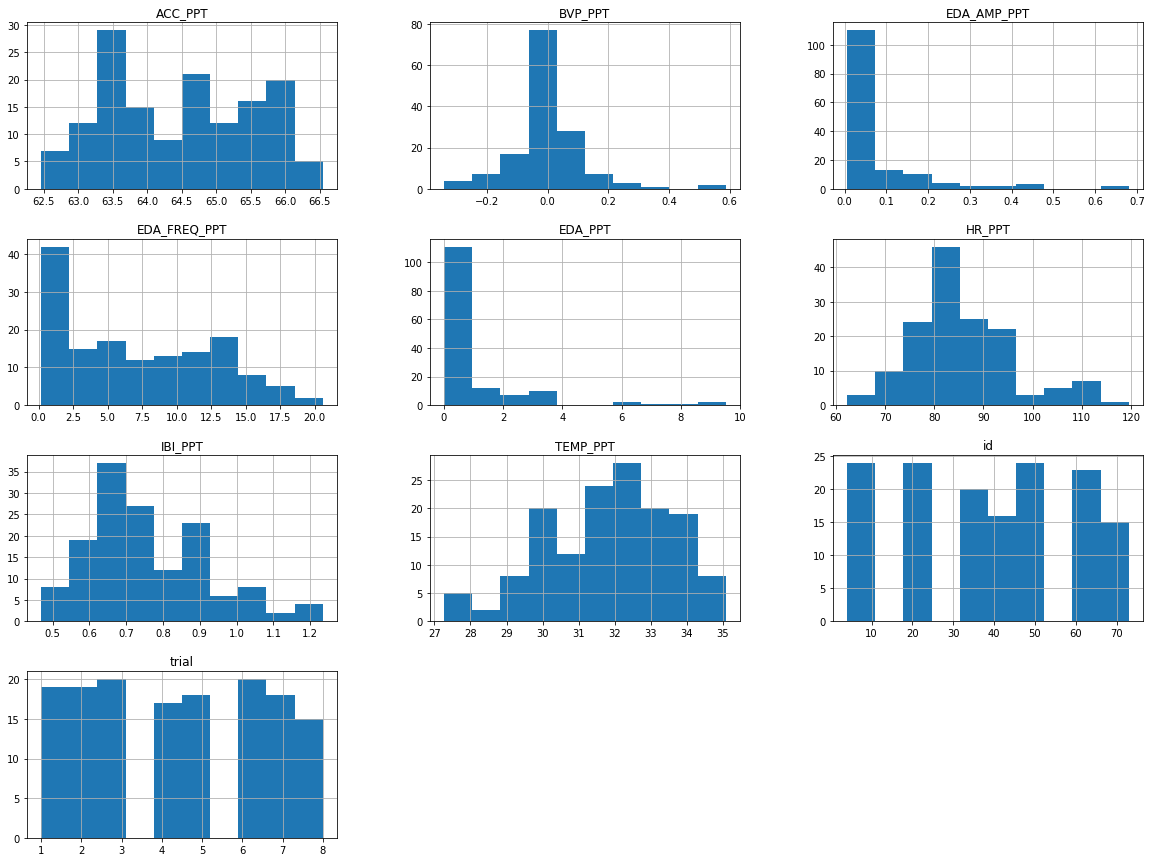

In [72]:
import matplotlib.pyplot as plt

e4_data.hist(bins=10, figsize=(20,15))
plt.show()

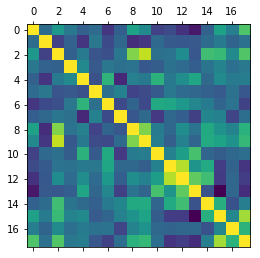

,id,trial,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
id,1.000000,0.013861,0.287014,0.085266,-0.057053,0.009437,-0.284801,-0.071799,0.345453,0.200912,-0.223300,-0.169073,-0.302330,-0.421219,-0.050141,0.347520,0.126497,0.581942
trial,0.013861,1.000000,-0.229998,-0.044264,-0.294585,0.079957,-0.185162,-0.008152,-0.327105,-0.283630,-0.006067,-0.091362,-0.105130,-0.098562,0.012565,0.102463,-0.031168,0.050064
EDA_PPT,0.287014,-0.229998,1.000000,-0.049602,0.099540,-0.121508,-0.155283,0.070478,0.713314,0.858861,0.034814,0.057069,0.213364,-0.108781,0.529689,0.505755,0.197157,0.584015
HR_PPT,0.085266,-0.044264,-0.049602,1.000000,0.192433,-0.096731,0.081580,0.039710,0.054170,-0.104195,-0.077256,0.046397,0.004740,-0.068442,0.060666,0.156818,0.034165,0.087243
TEMP_PPT,-0.057053,-0.294585,0.099540,0.192433,1.000000,-0.144949,0.463731,-0.347197,0.141519,0.090068,0.454658,0.093039,0.221582,0.368736,0.000199,0.201533,0.102922,0.119368
BVP_PPT,0.009437,0.079957,-0.121508,-0.096731,-0.144949,1.000000,0.038268,0.144950,-0.221569,-0.178445,-0.092366,0.087160,0.009624,-0.022868,-0.060585,-0.086682,0.043253,-0.113850
ACC_PPT,-0.284801,-0.185162,-0.155283,0.081580,0.463731,0.038268,1.000000,-0.185076,-0.034552,-0.189022,0.399909,0.371751,0.284811,0.178158,0.094320,-0.029367,0.054462,-0.232206
IBI_PPT,-0.071799,-0.008152,0.070478,0.039710,-0.347197,0.144950,-0.185076,1.000000,-0.112239,-0.000364,-0.272390,-0.015122,-0.070961,-0.234745,0.176831,0.142244,-0.206538,0.023692
EDA_FREQ_PPT,0.345453,-0.327105,0.713314,0.054170,0.141519,-0.221569,-0.034552,-0.112239,1.000000,0.705284,0.106834,-0.012071,0.222710,0.053455,0.401463,0.250528,0.154690,0.448568
EDA_AMP_PPT,0.200912,-0.283630,0.858861,-0.104195,0.090068,-0.178445,-0.189022,-0.000364,0.705284,1.000000,0.123676,-0.063180,0.146361,-0.030551,0.409218,0.360923,0.260315,0.491568


In [73]:
import matplotlib.pyplot as plt

plt.matshow(e4_data_results.corr())
plt.show()
e4_data_results.corr()


# Some conclusions:
# BFNE correlated to TEMP_PPT (0.454658)
# STAI State Score correlated to EDA_PPT (0.584015), EDA_FREQ_PPT (0.448568), EDA_AMP_PPT (0.491568)

# fit a line from the slopes 

In [74]:
# change this process around so that each time you're simply switching out the slope for another measure & merging 
# with survey results

training_changes = pd.DataFrame();

for label,_ in e4_data_results.items():
    if label == 'trial':
        continue
    if label[:3] in ["EDA", "HR_", "TEM", "BVP", "ACC", "IBI"]:
        training_changes.insert(training_changes.shape[1], label + " Slope", [0.0] * int(e4_data_results.shape[0] / 8))
    else:
        training_changes.insert(training_changes.shape[1], label, [0.0] * int(e4_data_results.shape[0] / 8))
    
    
i_change = 0
for i_e4 in range(e4_data_results.shape[0]):
    if e4_data_results.at[i_e4, "trial"] != 1:
        continue
    training_changes.at[i_change, "id"] = e4_data_results.at[i_e4, "id"]
    for i in range(9, 17):
        training_changes.iat[i_change, i] = e4_data_results.iat[i_e4, i + 1]
    #print(training_changes.at[i_change, "id"])
    final = i_e4 + 8
    if final > e4_data_results.shape[0]:
        final = e4_data_results.shape[0] - 1
    print(i_e4, final)
    for i in range(1, 9):
        #print(e4_data_results.iat[i_e4, i + 1], e4_data_results.iat[i_e4 + 7, i + 1])
        #training_changes.iat[i_change, i] = (e4_data_results.iat[final, i + 1] - e4_data_results.iat[i_e4, i + 1]) / e4_data_results.iat[i_e4, i + 1]
        training_changes.iat[i_change, i] = (e4_data_results.iat[final, i + 1] - e4_data_results.iat[i_e4, i + 1]) / 8
    i_change += 1
    
training_changes

0 8
8 16
16 24
24 32
30 38
36 44
47 55
55 63
63 71
71 77


,id,EDA_PPT Slope,HR_PPT Slope,TEMP_PPT Slope,BVP_PPT Slope,ACC_PPT Slope,IBI_PPT Slope,EDA_FREQ_PPT Slope,EDA_AMP_PPT Slope,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4.0,0.149014,1.214478,0.151627,-0.001821,0.123864,-0.034078,0.558944,0.016611,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,5.0,-0.146674,-0.921622,-0.172020,0.016153,-0.091820,0.058494,-1.343724,-0.017233,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
2,8.0,0.154123,1.397908,0.176649,-0.016774,-0.022930,-0.064130,1.729451,0.010823,0.089286,0.133333,0.128205,0.166667,0.083333,0.155172,0.187500,0.068182
3,32.0,-0.178517,-0.149480,-0.471642,0.003777,-0.189104,0.042645,-1.567461,-0.010862,0.486486,0.375000,0.272727,0.470588,-0.181818,-0.214286,0.274510,0.125000
4,37.0,0.417027,-0.005242,0.219005,-0.008322,-0.167827,-0.036379,0.493790,0.051122,-0.551724,0.176471,0.025641,-0.100000,-0.083333,-0.107143,0.302326,0.045455
5,42.0,-0.383069,0.114806,0.095197,0.014758,0.361593,0.012893,-1.974431,-0.016130,0.075472,-0.312500,-0.029851,0.153846,-0.040000,0.075758,0.220339,0.285714
6,50.0,-0.275759,-0.073714,-0.015052,0.004990,0.094634,-0.000943,-0.798577,-0.017400,0.069767,0.125000,0.057692,-0.058824,0.105263,0.021277,0.041667,0.047619
7,51.0,0.786430,0.968540,0.015239,-0.009023,-0.236244,0.012696,1.836349,0.028151,0.055556,0.050000,0.038462,0.117647,-0.066667,0.081633,0.041667,0.142857
8,61.0,-0.759430,-3.008688,-0.219715,-0.039412,0.147732,-0.015137,-0.844251,-0.014068,0.058824,0.266667,0.173913,-0.062500,0.333333,0.395349,0.222222,0.500000
9,66.0,-0.055006,0.479664,-0.293460,0.056740,-0.052157,0.020997,-1.543961,-0.014420,0.200000,0.052632,-0.033333,-0.043478,-0.111111,0.043478,0.140625,0.173077


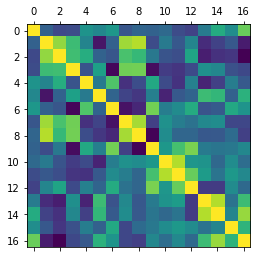

,id,EDA_PPT Slope,HR_PPT Slope,TEMP_PPT Slope,BVP_PPT Slope,ACC_PPT Slope,IBI_PPT Slope,EDA_FREQ_PPT Slope,EDA_AMP_PPT Slope,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
id,1.000000,-0.206622,-0.362682,-0.343211,0.144536,0.056877,0.175259,-0.283561,-0.181878,-0.199840,-0.156107,-0.346250,-0.408023,-0.023842,0.328027,0.106404,0.601386
EDA_PPT Slope,-0.206622,1.000000,0.717687,0.446610,0.040136,-0.649999,-0.209151,0.748336,0.804598,-0.347316,-0.029367,-0.272825,0.042750,-0.529777,-0.404396,-0.270924,-0.620113
HR_PPT Slope,-0.362682,0.717687,1.000000,0.460872,0.338449,-0.203879,-0.281631,0.498701,0.418652,-0.051518,-0.298697,-0.334227,0.268844,-0.603086,-0.502048,-0.473141,-0.752033
TEMP_PPT Slope,-0.343211,0.446610,0.460872,1.000000,-0.296291,0.245358,-0.722176,0.618061,0.629577,-0.697155,-0.443295,-0.479721,-0.360408,0.118381,0.058681,-0.316412,-0.373574
BVP_PPT Slope,0.144536,0.040136,0.338449,-0.296291,1.000000,-0.033822,0.516619,-0.500959,-0.338923,0.304120,-0.353448,-0.496967,0.007933,-0.579622,-0.417955,-0.012168,-0.265754
ACC_PPT Slope,0.056877,-0.649999,-0.203879,0.245358,-0.033822,1.000000,-0.188384,-0.391427,-0.465047,0.004855,-0.576735,-0.264415,-0.186133,0.452361,0.409846,-0.208878,0.377067
IBI_PPT Slope,0.175259,-0.209151,-0.281631,-0.722176,0.516619,-0.188384,1.000000,-0.663213,-0.554469,0.627292,-0.009292,0.095639,0.324600,-0.303087,-0.257529,0.306826,0.156780
EDA_FREQ_PPT Slope,-0.283561,0.748336,0.498701,0.618061,-0.500959,-0.391427,-0.663213,1.000000,0.765550,-0.417219,0.134805,-0.012806,-0.088800,0.062790,0.098175,-0.379620,-0.382168
EDA_AMP_PPT Slope,-0.181878,0.804598,0.418652,0.629577,-0.338923,-0.465047,-0.554469,0.765550,1.000000,-0.732531,0.100077,-0.171616,-0.171395,-0.271423,-0.261104,-0.138019,-0.422393
Brief fear of Negative Evaluation,-0.199840,-0.347316,-0.051518,-0.697155,0.304120,0.004855,0.627292,-0.417219,-0.732531,1.000000,0.174613,0.481884,0.647272,-0.035983,-0.070238,-0.049318,0.060351


In [75]:
plt.matshow(training_changes.corr())
plt.show()
training_changes.corr()

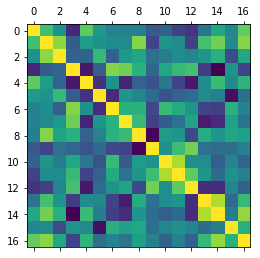

,id,EDA_PPT Var,HR_PPT Var,TEMP_PPT Var,BVP_PPT Var,ACC_PPT Var,IBI_PPT Var,EDA_FREQ_PPT Var,EDA_AMP_PPT Var,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
id,1.000000,0.492429,0.184724,-0.480923,0.588417,0.238214,0.071055,0.061112,0.051213,-0.199840,-0.156107,-0.346250,-0.408023,-0.023842,0.328027,0.106404,0.601386
EDA_PPT Var,0.492429,1.000000,0.714173,-0.173016,0.260491,0.182488,0.142224,0.130217,0.687687,-0.332531,0.195276,0.135707,-0.351214,0.505517,0.642542,0.134727,0.702939
HR_PPT Var,0.184724,0.714173,1.000000,-0.133990,-0.134167,0.452880,-0.154681,0.220162,0.317030,-0.040193,0.040865,0.142173,0.091030,0.196882,0.392252,-0.276461,0.331951
TEMP_PPT Var,-0.480923,-0.173016,-0.133990,1.000000,-0.551087,-0.161308,0.689638,0.640188,0.395604,-0.118502,0.326589,0.457151,0.508887,-0.377622,-0.666999,0.194253,-0.333833
BVP_PPT Var,0.588417,0.260491,-0.134167,-0.551087,1.000000,-0.422656,0.188815,-0.493622,-0.139771,-0.232395,-0.007700,-0.333757,-0.552700,0.141430,0.469588,0.123134,0.416462
ACC_PPT Var,0.238214,0.182488,0.452880,-0.161308,-0.422656,1.000000,-0.455545,0.212211,0.093419,-0.083048,-0.233831,-0.141740,-0.064748,0.133244,0.053393,-0.595401,-0.052960
IBI_PPT Var,0.071055,0.142224,-0.154681,0.689638,0.188815,-0.455545,1.000000,0.398207,0.400495,-0.290505,0.456875,0.357118,0.192893,-0.324194,-0.348311,0.389416,0.072074
EDA_FREQ_PPT Var,0.061112,0.130217,0.220162,0.640188,-0.493622,0.212211,0.398207,1.000000,0.468648,-0.338858,-0.188661,-0.045501,0.307988,-0.531874,-0.467725,0.288034,-0.022716
EDA_AMP_PPT Var,0.051213,0.687687,0.317030,0.395604,-0.139771,0.093419,0.400495,0.468648,1.000000,-0.641913,0.251595,0.202134,-0.295185,0.365815,0.204004,0.328649,0.278240
Brief fear of Negative Evaluation,-0.199840,-0.332531,-0.040193,-0.118502,-0.232395,-0.083048,-0.290505,-0.338858,-0.641913,1.000000,0.174613,0.481884,0.647272,-0.035983,-0.070238,-0.049318,0.060351


In [76]:
e4_var = training_changes.rename(columns=lambda x: x.replace("Slope", "Var"), inplace=False)

def calc_var():
    for i in range(e4_var.shape[0]):
        for j in range(1,9):
            var_list = []
            final = 8
            for k in range(final):
                #print(k + (8*i), j + 1)
                if k + (8*i) >= e4_data_results.shape[0]:
                    return
                var_list.append(e4_data_results.iat[k + (8*i), j + 1])
            e4_var.iat[i,j] = np.var(var_list)
    return
        
calc_var()

plt.matshow(e4_var.corr())
plt.show()
e4_var.corr()
#e4_var